In [1]:
import os
import sys
import warnings
import datetime
import time
from time import strftime

import numpy as np
import pandas as pd
import pandas_profiling as pdf

from calendar import monthrange

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()



In [2]:
df = pd.read_pickle('data_econ.pickle')
df.head()

,DATETIME,GVKEY,PERMNO,SYMBOL,INDUSTRY,VALUE,MOMENTUM,MONETARYPOLICY,GROWTH,INFLATION,RFRATE,RET,SP500TR
0,1963-01-31,1581,10401,T,32,0.613024,-0.131919,0.99,99.788054,0.012821,2.87,0.036403,0.049128
1,1963-01-31,5073,12079,GM,23,0.408998,0.030786,0.99,99.788054,0.012821,2.87,0.079570,0.049128
2,1963-01-31,4503,11850,XOM,30,0.686189,0.163202,0.99,99.788054,0.012821,2.87,0.006303,0.049128
3,1963-01-31,4087,11703,DD,14,0.336631,0.115541,0.99,99.788054,0.012821,2.87,0.026096,0.049128
4,1963-01-31,6066,12490,IBM,34,0.126757,-0.306857,0.99,99.788054,0.012821,2.87,0.086538,0.049128


In [3]:
df["RELRET"] = df["RET"] - df["SP500TR"]
df = df [["DATETIME","SYMBOL","PERMNO","INDUSTRY",
          "VALUE","MOMENTUM","MONETARYPOLICY","GROWTH","INFLATION", "RFRATE",
          "SP500TR", "RET", "RELRET"]]
df.to_pickle("df_eda.pickle")
df = pd.read_pickle('df_eda.pickle')
df.head()

,DATETIME,SYMBOL,PERMNO,INDUSTRY,VALUE,MOMENTUM,MONETARYPOLICY,GROWTH,INFLATION,RFRATE,SP500TR,RET,RELRET
0,1963-01-31,T,10401,32,0.613024,-0.131919,0.99,99.788054,0.012821,2.87,0.049128,0.036403,-0.012725
1,1963-01-31,GM,12079,23,0.408998,0.030786,0.99,99.788054,0.012821,2.87,0.049128,0.079570,0.030442
2,1963-01-31,XOM,11850,30,0.686189,0.163202,0.99,99.788054,0.012821,2.87,0.049128,0.006303,-0.042825
3,1963-01-31,DD,11703,14,0.336631,0.115541,0.99,99.788054,0.012821,2.87,0.049128,0.026096,-0.023032
4,1963-01-31,IBM,12490,34,0.126757,-0.306857,0.99,99.788054,0.012821,2.87,0.049128,0.086538,0.037410


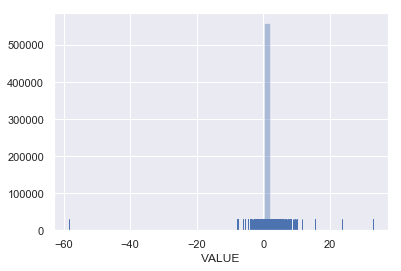

In [4]:
sns.distplot(df['VALUE'], bins=50, kde=False, rug=True);


In [5]:
# truncate extreme values until you get something approaching a normal histogram
print(df.shape)
tempdf = df[df["VALUE"] < 4.0]
print(tempdf.shape)
tempdf = tempdf[tempdf["VALUE"] > -2.0]
print(tempdf.shape)
df = tempdf
print(df.shape)

(582843, 13)
(582145, 13)
(581983, 13)
(581983, 13)


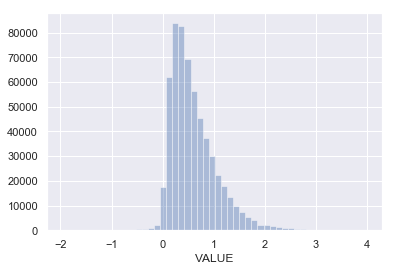

In [6]:
sns.distplot(df['VALUE'], bins=50, kde=False, rug=False);


In [7]:
print(df.shape)
tempdf = df[df["MOMENTUM"] < 5.0]
print(tempdf.shape)
tempdf = tempdf[tempdf["MOMENTUM"] > -2.0]
print(tempdf.shape)
df = tempdf
print(df.shape)

(581983, 13)
(581095, 13)
(581095, 13)
(581095, 13)


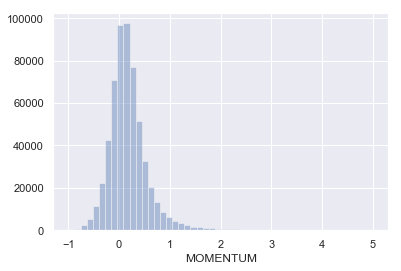

In [8]:
sns.distplot(df['MOMENTUM'], bins=50, kde=False, rug=False);


In [9]:
pdf.ProfileReport(df)

Number of variables,14
Number of observations,581095
Total Missing (%),0.0%
Total size in memory,62.1 MiB
Average record size in memory,112.0 B
Numeric,11
Categorical,1
Boolean,0
Date,1
Text (Unique),0
Rejected,1


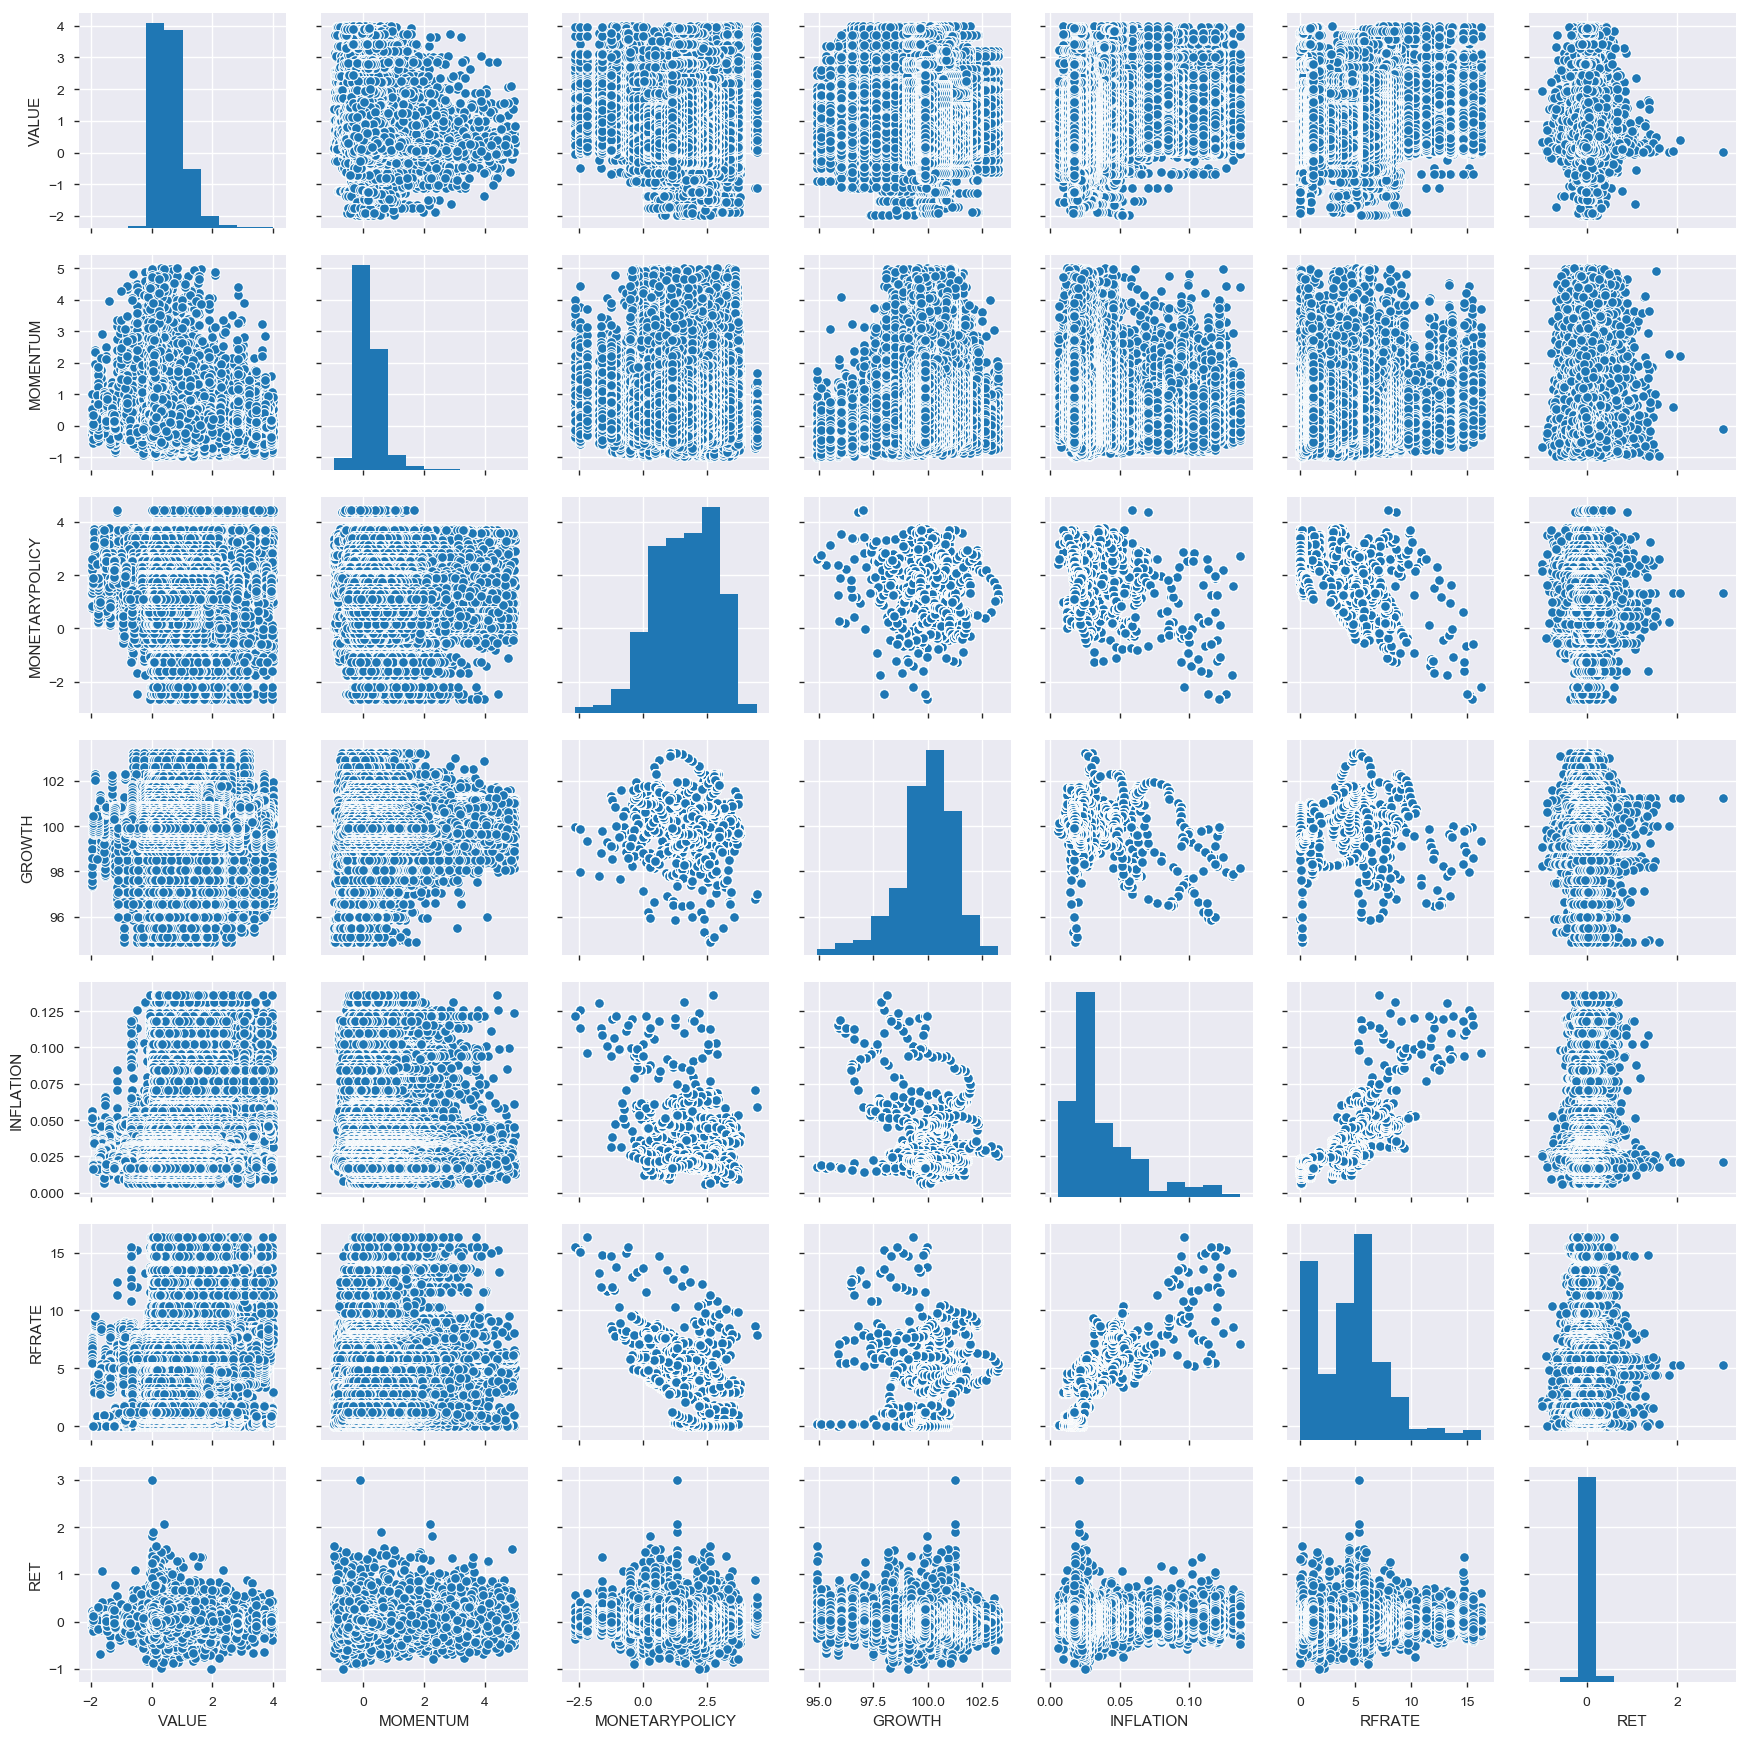

In [10]:
sns.pairplot(df[['VALUE', 'MOMENTUM', 'MONETARYPOLICY', 'GROWTH', 'INFLATION', 'RFRATE', 'RET']]);

In [11]:
%time df.to_pickle("data.pickle")


CPU times: user 111 ms, sys: 108 ms, total: 219 ms
Wall time: 520 ms


In [12]:
# TODO: lagged correlations
# Loop for i in range(1,13)
 # create lagged df
 # correlation matrix of lagged variables
 # append autocorrelations to list
# bar lagged autocorrelations
# extra credit - matrix with autocorrelation bar along diagonal, lagged correlations off diagonal
